### **Name: Rabia Akhtar**

### **Project: Intermediate Colleges of Pakistan EDA**

## **Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

## **Load the dataset**

In [2]:
dataset = pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')

## **Understand the data**

In [3]:
dataset.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [4]:
dataset.tail()

,Name,Location,Study Program,Sector,Affiliation,Rating
1625,Riphah International College Lodhran,Riphah International College Lodhran,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1626,Govt College of Education Bagh,Bagh Azad Kashmir,FA ICS Computer Science FSc Pre Engineering IC...,Public,NaN,0*
1627,Riphah International College Swat,Riphah International College Swat,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1628,Riphah International College Dina,Riphah International College Dina,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1629,Riphah International College Dargai,Riphah International College Dargai,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*


In [5]:
dataset.shape

(1630, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [7]:
dataset.describe()

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


In [8]:
dataset.dtypes

Name             object
Location         object
Study Program    object
Sector           object
Affiliation      object
Rating           object
dtype: object

In [9]:
dataset.columns

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')

## **Dropping the missing or null values**

In [10]:
print(dataset.isnull().sum())

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


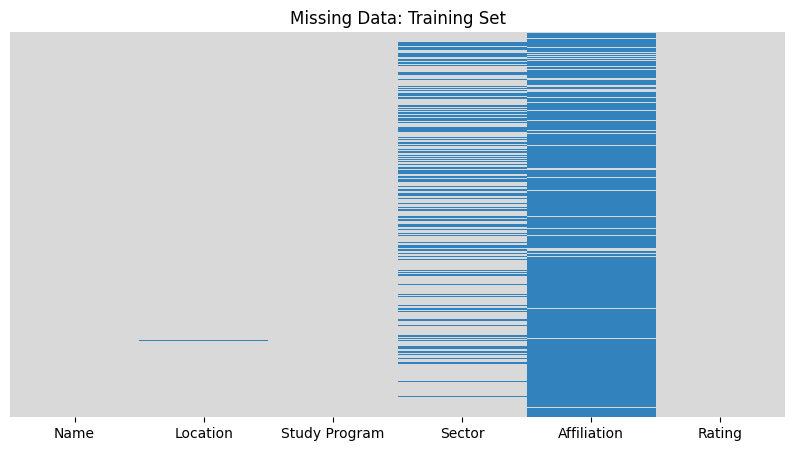

In [11]:
# Heatmap
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [12]:
# Remove Affiliation feature
dataset.drop('Affiliation', axis = 1, inplace = True)

In [14]:
dataset.head()

,Name,Location,Study Program,Sector,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5*


In [15]:
# Calculate the mode of the 'Sector' column
Sector_mode = dataset['Sector'].mode()[0]

# Fill missing values in the 'Sector' column with the mode
dataset['Sector'].fillna(Sector_mode, inplace=True)


In [16]:
# Remove rows with missing data
dataset.dropna(inplace = True)

In [17]:
# Remove rows with duplicate data
dataset.drop_duplicates(inplace = True)

In [18]:
print(dataset.isnull().sum())

Name             0
Location         0
Study Program    0
Sector           0
Rating           0
dtype: int64


In [19]:
dataset

,Name,Location,Study Program,Sector,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5*
...,...,...,...,...,...
1625,Riphah International College Lodhran,Riphah International College Lodhran,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,0*
1626,Govt College of Education Bagh,Bagh Azad Kashmir,FA ICS Computer Science FSc Pre Engineering IC...,Public,0*
1627,Riphah International College Swat,Riphah International College Swat,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,0*
1628,Riphah International College Dina,Riphah International College Dina,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,0*


## **Visualization Graphs**

### **Bar Plot**

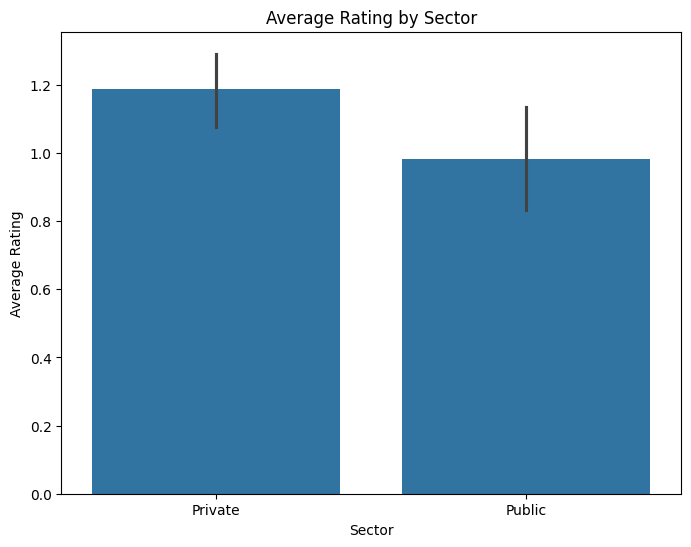

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, x='Sector', y=dataset['Rating'].str.replace('*', '').astype(float))
plt.title('Average Rating by Sector')
plt.ylabel('Average Rating')
plt.xlabel('Sector')
plt.show()

### **Count Plot**


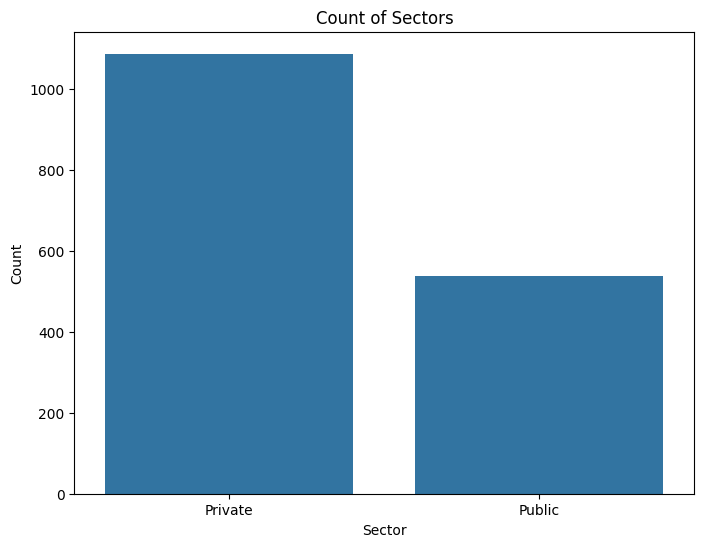

In [21]:
# Count plot for sectors
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Sector')
plt.title('Count of Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()



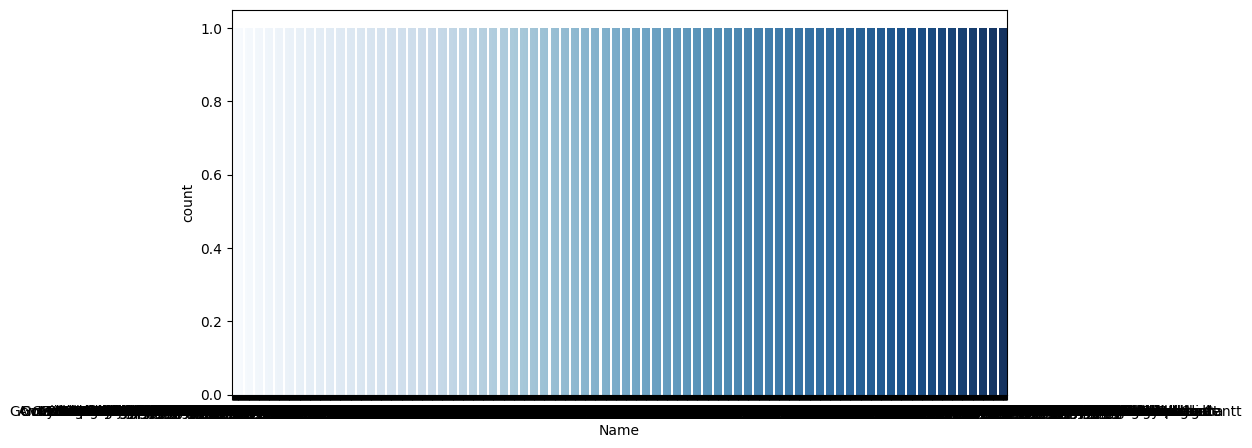

In [28]:
sns.countplot(x="Name", data=dataset, palette="Blues");
plt.show()


### **Conclusion:**
**Factors Influencing Ratings:** Through exploratory data analysis (EDA), I have identified several factors that influence the ratings of intermediate colleges. These factors include the location of the college, whether it belongs to the public or private sector, and the study programs offered. Understanding these factors is essential for improving ratings and overall educational quality.

**Recommendations for Improvement:** Based on the findings, I recommend targeted interventions to enhance the quality of education in intermediate colleges. These interventions may include improving infrastructure and resources, enhancing faculty quality, and implementing educational programs tailored to the specific needs of each region. By addressing these factors, we can enhance the national education standard and promote equal access to quality education for all students."